In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from google.colab import files
import io, requests, zipfile
from sklearn.cluster import KMeans

Read Parimah's data with a little preparation (for instance I removed '$' and ',' for more convenience)

In [14]:
data = pd.read_csv(r"C:\Users\Asus\Desktop\Universe\06Semester\Stat Modeling\00 Project\COVID-19-economical-effects/occupations_exposure_to_disease_data.csv", encoding= 'unicode_escape')
n_s = 100
data.head()

,Occ,Risk,income,number
0,Chief executives and senior officials,11.7,44.08,101000
1,Production managers and directors in manufactu...,7.5,21.92,313000
2,Production managers and directors in construction,4.0,21.28,210000
3,Production managers and directors in mining an...,9.0,21.68,19000
4,Financial managers and directors,5.5,31.42,352000


In [15]:
print(data.shape)

(359, 4)


In [12]:
#keep the features (risk, income and number) in X_p and scale them with it's corresponding maximum value
X = data.drop('Occ', axis=1)
X_max = X.max(axis = 0)
X = X / X_max

medic_list = X[X['medical staff or not'] == 1]
X = X[X['medical staff or not'] != 1]

medic_list = medic_list.drop('medical staff or not', axis=1)
X = X.drop('medical staff or not', axis=1)

print(X.shape)
print(medic_list.shape)

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In the following we intend to:
1-classify jobs to get a sense of what we are working with. We have so far 3 dimensions. We can classify jobs only base on [risk, income] or we can classify them in a 3d space where the features are [risk, income, number]
2-for each 2 pairs of features, plot them in different colors.

We use Unsupervised clustering KMeans method. MUST INDICATE THE NUMBER OF CLUSTERS.

ValueError: could not convert string to float: '26,000'

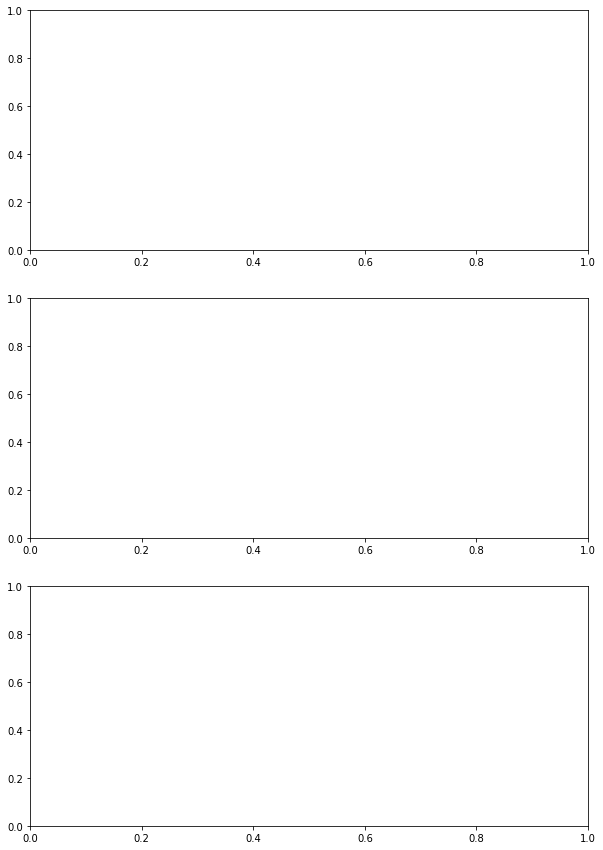

In [19]:
#Unsupervised clustering, THREE features (risk, number and income), THREE clusters.

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10,15))
axs = [ax1,ax2,ax3]
N_clusters = 3
N_space = 3

y_pred = KMeans(n_clusters=4, random_state=0).fit_predict(X)

features = ['risk', 'income', 'number']
features_r = ['income', 'number', 'risk']


for i in range(3):
    feat_1 = features[i]
    feat_2 = features_r[i]
    axs[i].scatter(X[feat_1],  X[feat_2], c=y_pred)
    axs[i].set_xlabel(feat_1)
    axs[i].set_ylabel(feat_2)
    if i == 0:
        axs[i].set_title('job classification in {}d space. # clusters = {}'.format(N_space, N_clusters))


KeyError: 'risk'

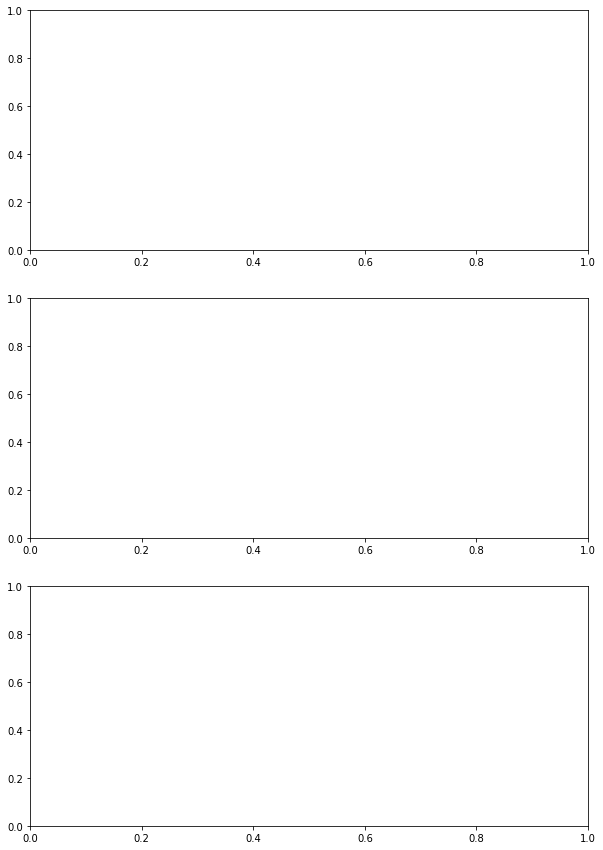

In [20]:
#Unsupervised clustering, TWO features (risk and income), THREE clusters
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (10,15))
axs = [ax1,ax2,ax3]
X_p = X.drop('number', axis = 1)

N_clusters = 3
N_space = 2

y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_p)
features = ['risk', 'income', 'number']
features_r = ['income', 'number', 'risk']

for i in range(3):
    feat_1 = features[i]
    feat_2 = features_r[i]
    axs[i].scatter(X[feat_1],  X[feat_2], c=y_pred)
    axs[i].set_xlabel(feat_1)
    axs[i].set_ylabel(feat_2)
    if i == 0:
        axs[i].set_title('job classification in {}d space. # clusters = {}'.format(N_space, N_clusters))


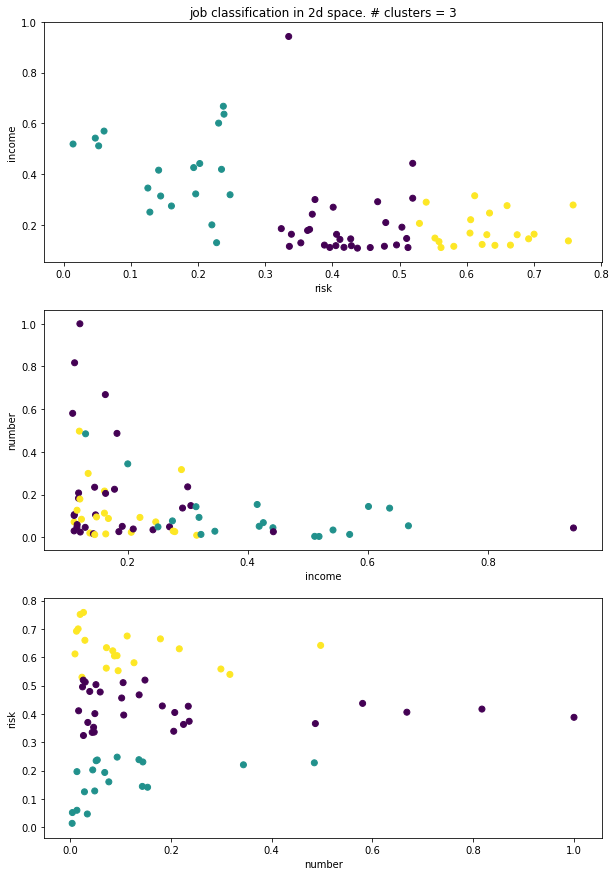

In [10]:
#Unsupervised clustering, ONE features (risk), THREE clusters
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (10,15))
axs = [ax1,ax2,ax3]
X_pp = X_p.drop('income', axis = 1)

N_clusters = 3
N_space = 2

y_pred = KMeans(n_clusters=3, random_state=1).fit_predict(X_pp)
features = ['risk', 'income', 'number']
features_r = ['income', 'number', 'risk']

for i in range(3):
    feat_1 = features[i]
    feat_2 = features_r[i]
    axs[i].scatter(X[feat_1],  X[feat_2], c=y_pred)
    axs[i].set_xlabel(feat_1)
    axs[i].set_ylabel(feat_2)
    if i == 0:
        axs[i].set_title('job classification in {}d space. # clusters = {}'.format(N_space, N_clusters))


Based on the last plot, one can ignore the "green" cluster (AKA medical staff). This group's characteristics: [High income, High risk, Low number]

In [11]:
X['risk_groups'] = y_pred
X['risk_groups'].head()

medic_list['risk_groups'] = len(medic_list) * [3]

In [12]:
X_final = [X,medic_list]
X_final = pd.concat(X_final)
X_final.shape


(100, 4)

In [13]:
# determining the average risk and income in each group

mean_risk = [0,0,0,0]
mean_income = [0,0,0,0]
pop_per_gr = [0,0,0,0]

for i in range(len(X_final)):
    if X_final['risk_groups'][i] == 0:
        mean_risk[0] += X_final['risk'][i] * X_final['number'][i]        # if you want the averages over jobs instead of population
        mean_income[0] += X_final['income'][i] * X_final['number'][i]    # , delete the last term
        pop_per_gr[0] += X_final['number'][i]                     #1 and set this to 1
    if X_final['risk_groups'][i] == 1:
        mean_risk[1] += X_final['risk'][i] * X_final['number'][i]
        mean_income[1] += X_final['income'][i] * X_final['number'][i]    
        pop_per_gr[1] += X_final['number'][i]
    if X_final['risk_groups'][i] == 2:
        mean_risk[2] += X_final['risk'][i] * X_final['number'][i]
        mean_income[2] += X_final['income'][i] * X_final['number'][i]
        pop_per_gr[2] += X_final['number'][i]
    if X_final['risk_groups'][i] == 3:
        mean_risk[3] += X_final['risk'][i] * X_final['number'][i]
        mean_income[3] += X_final['income'][i] * X_final['number'][i]
        pop_per_gr[3] += X_final['number'][i]
        
mean_risk = np.array(mean_risk) / np.array(pop_per_gr)
mean_income = np.array(mean_income) /np.array(pop_per_gr)

group_labels = ['medium risk', 'low risk', 'high risk', 'medical staff']

In [14]:
group_labels


['medium risk', 'low risk', 'high risk', 'medical staff']

In [15]:
d = pd.DataFrame()
d['group label'] = group_labels
d['risk'] = np.round(mean_risk, 2)
d['average income'] = np.round(mean_income, 2)
d['population'] = np.round(pop_per_gr,2)
d

,group label,risk,average income,population
0,medium risk,0.41,0.16,5.94
1,low risk,0.20,0.32,1.95
2,high risk,0.61,0.17,2.39
3,medical staff,0.78,0.30,2.28


In [ ]:
# plotting income vs risk for each grous and their average risks and incomes

fig, ax = plt.subplots(figsize = (10,6))
ax.set_xlabel('risk')
ax.set_ylabel('income')
ax.set_title('job clustering')

colors = ['m','green','darkorange','blue']
for i in range(4):
    ax.scatter(mean_risk[i], mean_income[i], color = colors[i] ,marker = 'D', label = group_labels[i])
ax.legend()

ax.scatter(X_final['risk'][:68],  X_final['income'][:68], c=y_pred)
ax.scatter(X_final['risk'][68:],  X_final['income'][68:])

for i in range(4):
    ax.scatter(mean_risk[i], mean_income[i], color = colors[i] ,marker = 'D')